![Photo by DATAIDEA](../assets/banner4.png)

## Unsupervised Learning using Scikit Learn

The following topics are covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Let's install the required libraries.

In [ ]:
# # uncomment and run this cell to install the packages and libraries
# !pip install dataidea

## Introduction to Unsupervised Learning

Unsupervised machine learning refers to the category of machine learning techniques where models are trained on a dataset without labels. Unsupervised learning is generally use to discover patterns in data and reduce high-dimensional data to fewer dimensions. Here's how unsupervised learning fits into the landscape of machine learning algorithms([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="100%">

Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="100%">


Scikit-learn offers the following cheatsheet to decide which model to pick for a given problem. Can you identify the unsupervised learning algorithms?

<img src="../assets/ml_map.svg" width="100%"/>

Here is a full list of unsupervised learning algorithms available in Scikit-learn: [https://scikit-learn.org/stable/unsupervised_learning.html](https://scikit-learn.org/stable/unsupervised_learning.html)

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

## Clustering 

Clustering is the process of grouping objects from a dataset such that objects in the same group (called a cluster) are more similar (in some sense) to each other than to those in other groups ([Wikipedia](https://en.wikipedia.org/wiki/Cluster_analysis)). Scikit-learn offers several clustering algorithms. You can learn more about them here: https://scikit-learn.org/stable/modules/clustering.html


Here is a visual representation of clustering:

<img src="https://i.imgur.com/VXPgw6H.png" width="100%">



Here are some real-world applications of clustering:

* Customer segmentation 
* Product recommendation
* Feature engineering
* Anomaly/fraud detection
* Taxonomy creation


We'll use the [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) to study some of the clustering algorithms available in `scikit-learn`. It contains various measurements for 150 flowers belonging to 3 different species.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

sns.set_style('darkgrid')
%matplotlib inline

Let's load the popular iris and penguin datasets. These datasets are already built in seaborn

In [3]:
# load the iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# load the penguin dataset
sns.get_dataset_names()
ping_df = sns.load_dataset('penguins')
ping_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


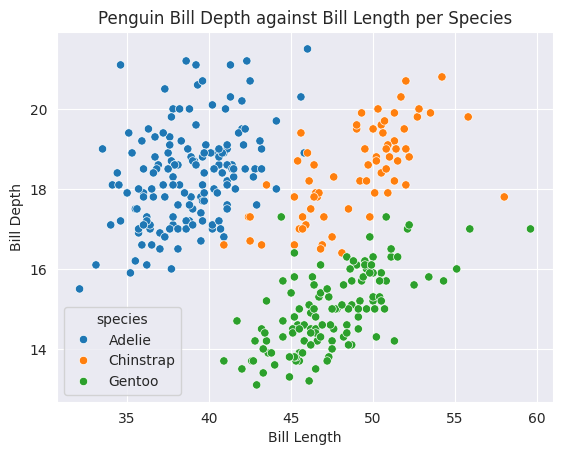

In [13]:
sns.scatterplot(data=ping_df, x='bill_length_mm', y='bill_depth_mm', hue='species')
plt.title('Penguin Bill Depth against Bill Length per Species')
plt.ylabel('Bill Depth')
plt.xlabel('Bill Length')
plt.show()

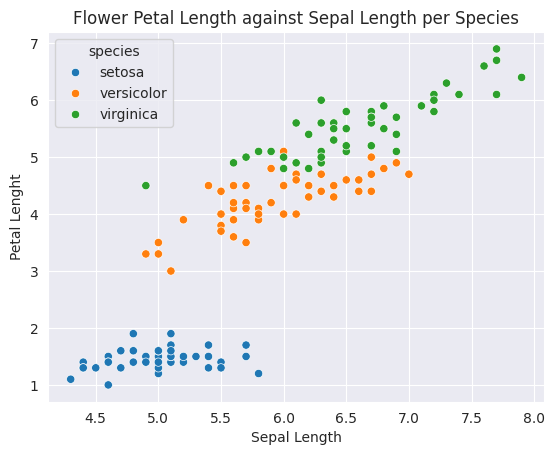

In [12]:
sns.scatterplot(data=iris_df, x='sepal_length', y='petal_length', hue='species')
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

We'll attempt to cluster observations using numeric columns in the data. 

In [14]:
numeric_cols = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
X = iris_df[numeric_cols]
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>


### K Means Clustering

The K-means algorithm attempts to classify objects into a pre-determined number of clusters by finding optimal central points (called centroids) for each cluster. Each object is classifed as belonging the cluster represented by the closest centroid.

<img src="https://miro.medium.com/max/1400/1*rw8IUza1dbffBhiA4i0GNQ.png" width="100%">

Here's how the K-means algorithm works:

1. Pick K random objects as the initial cluster centers.
2. Classify each object into the cluster whose center is closest to the point.
3. For each cluster of classified objects, compute the centroid (mean).
4. Now reclassify each object using the centroids as cluster centers.
5. Calculate the total variance of the clusters (this is the measure of goodness).
6. Repeat steps 1 to 6 a few more times and pick the cluster centers with the lowest total variance.

Here's a video showing the above steps:

<div class="video-wrapper">
  <iframe
    class="video-iframe"
    src="https://www.youtube.com/embed/4b5d3muPQmA?si=gRmfb4U7-YHj_Yug"
    title="YouTube video player"
    frameborder="0"
    allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture;"
    allowfullscreen
  >
  </iframe>
</div>

Let's apply K-means clustering to the Iris dataset.

In [15]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

KMeans(n_clusters=3, random_state=42)

We can check the cluster centers for each cluster.

In [22]:
model.cluster_centers_

array([[ 6.85384615e+00,  3.07692308e+00,  5.71538462e+00,
         2.05384615e+00, -8.88178420e-16],
       [ 5.00600000e+00,  3.42800000e+00,  1.46200000e+00,
         2.46000000e-01,  1.00000000e+00],
       [ 5.88360656e+00,  2.74098361e+00,  4.38852459e+00,
         1.43442623e+00,  2.00000000e+00]])

We can now classify points using the model.

In [24]:
# making predictions on X (clustering)
preds = model.predict(X)
# assign each row to their cluster
X['clusters'] = preds
# looking at some samples
X.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,clusters
88,5.6,3.0,4.1,1.3,2
24,4.8,3.4,1.9,0.2,1
131,7.9,3.8,6.4,2.0,0
81,5.5,2.4,3.7,1.0,2
132,6.4,2.8,5.6,2.2,0


Let's use seaborn and pyplot to visualize the clusters

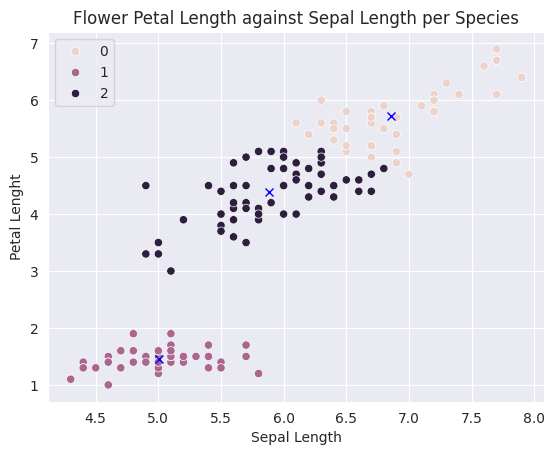

In [26]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

As you can see, K-means algorithm was able to classify (for the most part) different specifies of flowers into separate clusters. Note that we did not provide the "species" column as an input to `KMeans`.

We can check the "goodness" of the fit by looking at `model.inertia_`, which contains the sum of squared distances of samples to their closest cluster center. Lower the inertia, better the fit.

In [ ]:
model.inertia_

78.8556658259773

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

Let's try creating 6 clusters.

In [29]:
model = KMeans(n_clusters=6, random_state=42)
# fitting the model
model.fit(X)
# making predictions on X (clustering)
preds = model.predict(X)
# assign each row to their cluster
X['clusters'] = preds
# looking at some samples
X.sample(n=5)

,sepal_length,sepal_width,petal_length,petal_width,clusters
13,4.3,3.0,1.1,0.1,1
20,5.4,3.4,1.7,0.2,5
127,6.1,3.0,4.9,1.8,0
40,5.0,3.5,1.3,0.3,5
70,5.9,3.2,4.8,1.8,0


Let's visualize the clusters

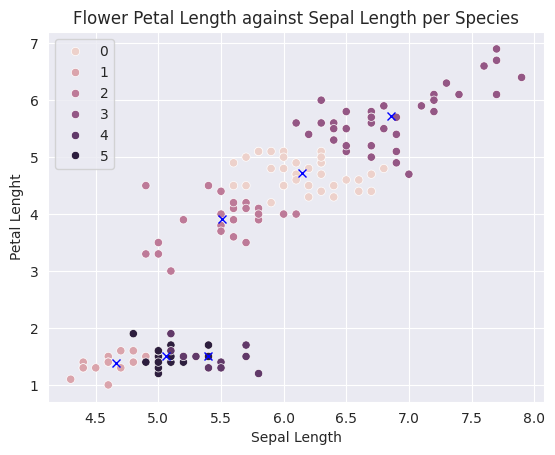

In [30]:
sns.scatterplot(data=X, x='sepal_length', y='petal_length', hue=preds)
centers_x, centers_y = model.cluster_centers_[:,0], model.cluster_centers_[:,2]
plt.plot(centers_x, centers_y, 'xb')
plt.title('Flower Petal Length against Sepal Length per Species')
plt.ylabel('Petal Lenght')
plt.xlabel('Sepal Length')
plt.show()

In [31]:
# Let's calculate the new model inertia
model.inertia_

50.560990643274856

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

### So, what number of clusters is good enough?

In most real-world scenarios, there's no predetermined number of clusters. In such a case, you can create a plot of "No. of clusters" vs "Inertia" to pick the right number of clusters.

Text(0, 0.5, 'Inertia')

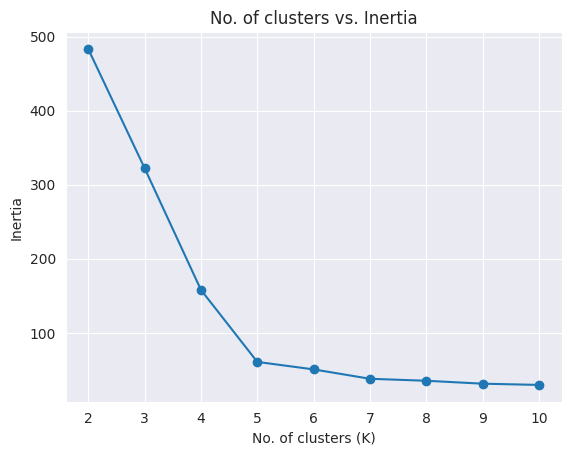

In [32]:
options = range(2, 11)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)
    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xlabel('No. of clusters (K)')
plt.ylabel('Inertia')

The chart is creates an "elbow" plot, and you can pick the number of clusters beyond which the reduction in inertia decreases sharply.

**Mini Batch K Means**: The K-means algorithm can be quite slow for really large dataset. Mini-batch K-means is an iterative alternative to K-means that works well for large datasets. Learn more about it here: https://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans



> **EXERCISE**: Perform clustering on the [Mall customers dataset](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python) on Kaggle. Study the segments carefully and report your observations.

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

## Summary and References

<img src="https://i.imgur.com/VbVFAsg.png" width="100%">

The following topics were covered in this tutorial:

- Overview of unsupervised learning algorithms in Scikit-learn
- Clustering algorithms: K Means, DBScan, Hierarchical clustering etc.
- Dimensionality reduction (PCA) and manifold learning (t-SNE)


Check out these resources to learn more:

- [https://www.coursera.org/learn/machine-learning](https://www.coursera.org/learn/machine-learning)
- [https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/](https://dashee87.github.io/data%20science/general/Clustering-with-Scikit-with-GIFs/)
- [https://scikit-learn.org/stable/unsupervised_learning.html](https://scikit-learn.org/stable/unsupervised_learning.html)
- [https://scikit-learn.org/stable/modules/clustering.html](https://scikit-learn.org/stable/modules/clustering.html)

[ad]
<script async src="https://pagead2.googlesyndication.com/pagead/js/adsbygoogle.js?client=ca-pub-8076040302380238"
     crossorigin="anonymous"></script>
<!-- inline-square -->
<ins class="adsbygoogle"
     style="display:block"
     data-ad-client="ca-pub-8076040302380238"
     data-ad-slot="3564352555"
     data-ad-format="auto"
     data-full-width-responsive="true"></ins>
<script>
     (adsbygoogle = window.adsbygoogle || []).push({});
</script>

## Credit

#### Do you seriously want to learn Programming and Data Analysis with Python?

If you’re serious about learning Programming, Data Analysis with Python and getting prepared for Data Science roles, I highly encourage you to enroll in my Programming for Data Science Course, which I've taught to hundreds of students. Don’t waste your time following disconnected, outdated tutorials

My Complete Programming for Data Science Course has everything you need in one place. 

The course offers:

- Duration: Usually 3-4 months
- Sessions: Four times a week (one on one)
- Location: Online or/and at UMF House, Sir Apollo Kagwa Road

What you'l learn:

- Fundamentals of programming
- Data manipulation and analysis
- Visualization techniques
- Introduction to machine learning
- Database Management with SQL (optional)
- Web Development with Django (optional)

Best

Juma Shafara

Data Scientist, Instructor

jumashafara0@gmail.com / dataideaorg@gmail.com

+256701520768 / +256771754118